# Give me some credit (training)
* Máster en Data Science y Finanzas, CUNEF
* Subject: Machine learning
* Authors: Raquel Fort, Lucía Saiz, María Carrasco
* Contact: raquel.fort@cunef.edu, l.saiz@cunef.edu, m.carrascomelendez@cunef.edu

## Table of contents:

1.  Goal
2.  Dataset and variables
3.  Methodology
4.  EDA.
    - Histograms 
    - Correlation matrix
5.  Categorical and numerical datasets
    - Treatment numerical dataset.
    - Treatment categorical dataset: Dummies.
    - Outliers.
6.  Lasso model (variable importance)
7.  Train & Test and Oversampling
8.  Support Vector Machine (SVM)
9.  Logistic Regression
10.  Random Forest
11.  XGBOOST
12.  ROC Curves. Comparisons.
13.  Conclusions
14.  References

## 1. Goal

The aim of this document is to predict if the future customers who are interested in a loan concession will commit a default based on our study. This is why our dependent variable or the variable that we aim to predict with our study will be default.

## 2. Dataset and variables

The dataset used in this document has been downloaded from Kaggle, an open data website.
It contains 156 variables related with the customers' information such as their personal information, the quality of their bank accounts, data refered to their payments and some other relevant information about their daily activities.
Although all these variables are needed for the explanation of our model, based on our business knowledge and having studied the relationships between them, we are going to select the variables which are more significant in the achievement of our goal.
Following our selection, we will be describing each variable used in this document:

- __*acc_now_delinq*__: The number of accounts on which the borrower is now delinquent.We have chosen this variable because it shows if the borrower has committed default and in which accounts.

- __*acc_open_past_24mths*__: Number of trades opened in past 24 months.We have chosen this variable because it shows the quantity of trades made by the customer.

- __*addr_state*__: The state provided by the borrower in the loan application. The reason for choosing this variable is that it contains relevant personal information about the borrower in the study. In each area we can find different behaviour patterns in terms of returning the loan or not, but of course not in all cases.

- __*all_util*__: Balance to credit limit on all trades. It shows the quantity of the credit used of the total, with this rate we can identify those clients that go beyond their limit.

- __*annual_inc*__: The self-reported annual income provided by the borrower during registration. With this variable, we can know if the customer will be capable of returning the loan or not according to the size of their income.

- __*application_type*__: Indicates whether the loan is an individual application or a joint application with two co-borrowers. If there are two co-borrowers, we have a higher probability of not committing default rather than with a single borrower, which is why we select it.

- __*delinq_2yrs*__: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. We have considered that if the client commits incidences of more than 30 days in the last two years it is very likely that they will decide not to continue making payments.

- __*delinq_amnt*__: The past-due amount owed for the accounts on which the borrower is now delinquent. This variable shows exactly the amount exceeded in the accounts in which the customer has been declared as delinquent. It is important in order to know the total default quantity.

- __*desc*__: Loan description provided by the borrower, this variable has 90% of missing values which we considered that meant that the borrower did not want to give us information about the reason for borrowing a loan and was likely associated to default.

- __*dti*__: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. Basically, it measures the monthly solvency of the borrowers, which allow the company to make a correct follow up of the borrowers and foresee if the will commit default or not.

- __*emp_length*__: Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. With this variable we can see the stability of the client, which means that the ones that have a long-time employment are more likely to have monthly income. This way, we can deduce which ones will be more stable in their payments.

- __*funded_amnt*__: The total amount committed to that loan at that point in time. It indicates the amount committed between the borrower and the bank; the higher quantities are more difficult to be payed so the higher the loan amount, the higher the chances of default.

- __*grade*__: LC assigned loan grade. It is important because it classifies the different types of borrowers into 7 categories from A to G, indicating the most and least reliables.

- __*home_ownership*__: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER, ANY. In case of default, the bank can consider the properties or other rents of the borrower in order to complement the default. In addition, the clients who have a mortgage or live on rent will probably have more difficulties in paying back a loan than the rest.

- __*initial_list_status*__: The initial listing status of the loan. Possible values are – W(whole), F(fractioned). Customers who asumme fractioned payments are more likely to commit default. 

- __*installment*__: The monthly payment owed by the borrower if the loan originates. This variable shows the monthly quantity that the borrower has to pay, if all the installments are committed, it means that the customer will repay the loan satisfactorily and vice versa.

- __*int_rate*__: Interest Rate on the loan, the interest is an important variable due to the fact that it represents the gain for the bank of giving the loan and the extra cost for the borrower, so it is important to know whether the payment will be made next to the installment.

- __*last_pymnt_amnt*__: Last total payment amount received. If the last payment is recent and it is committed, it means that this borrower is more likely to pay back their debt.

- __*loan_amnt*__: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. The total sum of this variable indicates the total quantity given by the bank.

- __*mo_sin_rcnt_tl*__: Months since most recent account opened.

- __*mths_since_last_delinq*__: The number of months since the borrower's last delinquency. If this number is high, the borrower is more likely to commit default.

- __*num_accts_ever_120_pd*__: Number of accounts ever 120 or more days past due. If this number is high, the borrower has more probabilities to commit default.

- __*num_il_tl*__: Number of installment accounts. The higher the number of months that passed since the last default, the less likely it is for the borrower to repay the loan.

- __*num_sats*__: Number of satisfactory accounts. Accounts that have commit correctly their payments and in which the borrower does not commit default. 

- __*num_tl_120dpd_2m*__: Number of accounts currently 120 days past due (updated in past 2 months). If this number is high, the borrower has more probabilities to commit default (updated in past 2 months).

- __*out_prncp*__: Remaining outstanding principal for total amount funded. Amount of money that has not been payed by the borrower, if this quantity is very high is more difficult to be payed.

- __*pub_rec_bankruptcies*__: Number of public record bankruptcies. It shows if the customer or a firm(the borrower) has been in a bankrupticy.

- __*recoveries*__: Post charge off gross recovery. Amount of money that has been recovered and is not in default anymore.

- __*term*__: The number of payments on the loan. Values are in months and can be either 36 or 60. Dependending on the time is more or less probable to return the loan.

- __*title*__: The loan title provided by the borrower. Purpose of the concesion of the loan, if it is for the repay of other debts we have less probabilities to recover the amount of money.

- __*tot_coll_amt*__: Total collection amounts ever owed, we have chosen this variable because depending on this amount, it is more or less probable that it can be returned.

- __*tot_cur_bal*__: Total current balance of all accounts, it shows the statement of the accounts, if they have defaults or not.

- __*total_acc*__: The total number of credit lines currently in the borrower's credit file, the more lines of credit the borrower has opened, the more likely to default.

- __*total_pymnt*__: Payments received to date for total amount funded. This variable is very relevant in this model because it explains the default very thoroughly, which is our dependent variable, because the more payments that are committed, the less default we are likely to have.

- __*debt_settlement_flag*__: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company. It explains if the borrower is trying to resolve the delinquency by indebting themselves with another company.


## 3. Methodology

The first step is to load the libraries required for the correct execution of each step of our methodology process.
Once the libraries that we will use, as well as the database with the selected variables are loaded, we decide to carry out the exploratory data analysis.
After removing the null values and the outliers, we will scale the numerical variables and transform the categorical ones into dummies.
With our database already clean, we will launch the lasso model allowing us to select the real significant variables with which we are going to launch the different models. To continue, and after splitting our data into train and test, we will be carrying out the Support Vector Machine, the Logistic regression, the random forest and the XGBoost.
Finally, we will compare the ROC curves of all four models previously executed with which we can conclude our study.

The purpose of each of the following libraries is pretty different. We can distinguish them between:

- Libraries used for Python functions.
- Libraries used for plotting.
- Libraries used for the Lasso Model
- Libraries used for the Random Forest.
- libraries used for the XGBOOST model.
- Libraries used for the SVM.
- Libraries used for the ROC curve.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from matplotlib import pyplot
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import r2_score # R^2
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from math import sqrt # sqrt
import random
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # SVM
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb # XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
%matplotlib inline

After loading all the libraries required to execute all of our code, we proceed to load our database with the name of data_orig.

In [99]:
data_path = './data/training_set.csv'

In [100]:
data_orig = pd.read_csv(data_path, low_memory = False) 

We create the dependent variable which we need for the prediction part of our models using the loan_status variable, which shows the current status of the loan. We decide that, what we find relevant for deciding if the loan is in default or not is whether the loan is fully paid (0) or if does not meet the credit policy (default, 1). We convert it into a categorical variable giving 0 and 1 to those statements.

In [101]:
data_orig['default'] = data_orig['target']

Finally, we select the variables mentioned above in order to achieve our goal, saving them with the name 'data' and that will be treated and cleaned with the purpose of being used to calculate the most accurate possible models. 

In [102]:
data = data_orig.loc[:, ['default', 'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
                         'application_type','delinq_2yrs','delinq_amnt','desc','dti','emp_length','funded_amnt','grade',
                         'home_ownership','initial_list_status','installment','int_rate','last_pymnt_amnt','loan_amnt',
                         'mo_sin_rcnt_tl','mths_since_last_delinq','num_accts_ever_120_pd','num_il_tl','num_sats',
                         'num_tl_120dpd_2m','out_prncp','pub_rec_bankruptcies','recoveries','term','title','tot_coll_amt',
                         'tot_cur_bal','total_acc','total_pymnt','debt_settlement_flag']]

## 4. EDA

The EDA helps us organize the information that "data" gives us in order to detect certain patterns of behavior as well as important values to the underlying model.
Exploring the data must be the first step of any type of data analysis.

Up next, we can see a small preview of the database with the first 5 rows and 36 columns.

In [103]:
data.head()

,default,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,application_type,delinq_2yrs,delinq_amnt,desc,...,out_prncp,pub_rec_bankruptcies,recoveries,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,debt_settlement_flag
0,0,0.0,10.0,AR,NaN,62000.0,Individual,1.0,0.0,NaN,...,0.0,0.0,0.0,60 months,Debt consolidation,6471.0,80960.0,44.0,26177.320006,N
1,0,0.0,5.0,NJ,NaN,35000.0,Individual,0.0,0.0,NaN,...,0.0,0.0,0.0,36 months,Debt consolidation,0.0,3653.0,7.0,4490.450000,N
2,0,0.0,NaN,TX,NaN,60000.0,Individual,0.0,0.0,I am requesting a small loan as an advance to...,...,0.0,0.0,0.0,36 months,Wedding Expense,NaN,NaN,10.0,10852.261203,N
3,0,0.0,12.0,TX,43.0,75500.0,Individual,0.0,0.0,NaN,...,0.0,0.0,0.0,36 months,Other,664.0,203637.0,29.0,3554.334411,N
4,1,0.0,2.0,GA,86.0,58803.0,Individual,0.0,0.0,NaN,...,0.0,1.0,0.0,60 months,NaN,0.0,54631.0,9.0,6311.910000,N


We use the function info() to generate general information about the data frame. The data types of our variables range from int32, int64, float64 and object. Here is where we can clearly differentiate our categorical and numerical variables.

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 36 columns):
default                   1000000 non-null int64
acc_now_delinq            999975 non-null float64
acc_open_past_24mths      962376 non-null float64
addr_state                1000000 non-null object
all_util                  392959 non-null float64
annual_inc                999996 non-null float64
application_type          1000000 non-null object
delinq_2yrs               999975 non-null float64
delinq_amnt               999975 non-null float64
desc                      94326 non-null object
dti                       999738 non-null float64
emp_length                941502 non-null object
funded_amnt               1000000 non-null int64
grade                     1000000 non-null object
home_ownership            1000000 non-null object
initial_list_status       1000000 non-null object
installment               1000000 non-null float64
int_rate                  1000000 non-null

The described method shows the basic statistical characteristics of each numerical variable: the number of observations of each variable, mean, standard deviation, minimum and maximum values, mediana and quartiles 0.25 and 0.75.

In [105]:
data.describe()

,default,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,...,num_il_tl,num_sats,num_tl_120dpd_2m,out_prncp,pub_rec_bankruptcies,recoveries,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt
count,1000000.000000,999975.000000,962376.000000,392959.000000,9.999960e+05,999975.000000,999975.000000,999738.000000,1000000.000000,1000000.000000,...,947201.000000,956017.000000,909788.000000,1000000.000000,998981.000000,1000000.000000,9.472010e+05,9.472010e+05,999975.000000,1000000.000000
mean,0.216465,0.005119,4.704464,58.288524,7.623989e+04,0.318938,15.160914,18.285760,14445.787425,439.107471,...,8.573017,11.640711,0.000827,214.976874,0.135127,231.142420,2.466692e+02,1.409491e+05,24.979721,14667.372295
std,0.411835,0.076766,3.193186,20.929622,7.294900e+04,0.877683,838.906472,10.955874,8723.665205,261.833534,...,7.392380,5.484799,0.030338,1924.683025,0.378603,934.324249,1.105568e+04,1.576780e+05,12.008402,10319.021365
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1.000000,500.000000,4.930000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,0.000000,0.000000,2.000000,45.000000,4.575000e+04,0.000000,0.000000,11.790000,8000.000000,249.130000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.937600e+04,16.000000,6722.615742
50%,0.000000,0.000000,4.000000,60.000000,6.500000e+04,0.000000,0.000000,17.630000,12000.000000,375.540000,...,7.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,7.986500e+04,23.000000,11998.606989
75%,0.000000,0.000000,6.000000,73.000000,9.000000e+04,0.000000,0.000000,24.070000,20000.000000,582.080000,...,11.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.104900e+05,32.000000,20359.250996
max,1.000000,5.000000,56.000000,239.000000,1.099920e+07,39.000000,249925.000000,999.000000,40000.000000,1715.420000,...,159.000000,90.000000,4.000000,40000.000000,12.000000,39859.550000,9.152545e+06,8.000078e+06,176.000000,62948.990956


With the function is.na() we can easily see if there are missing values to help us decide how to treat them.

In [106]:
data.isna().sum()

default                        0
acc_now_delinq                25
acc_open_past_24mths       37624
addr_state                     0
all_util                  607041
annual_inc                     4
application_type               0
delinq_2yrs                   25
delinq_amnt                   25
desc                      905674
dti                          262
emp_length                 58498
funded_amnt                    0
grade                          0
home_ownership                 0
initial_list_status            0
installment                    0
int_rate                       0
last_pymnt_amnt                0
loan_amnt                      0
mo_sin_rcnt_tl             52799
mths_since_last_delinq    503222
num_accts_ever_120_pd      52799
num_il_tl                  52799
num_sats                   43983
num_tl_120dpd_2m           90212
out_prncp                      0
pub_rec_bankruptcies        1019
recoveries                     0
term                           0
title     

Columns of the dataset. 

In [107]:
data.columns

Index(['default', 'acc_now_delinq', 'acc_open_past_24mths', 'addr_state',
       'all_util', 'annual_inc', 'application_type', 'delinq_2yrs',
       'delinq_amnt', 'desc', 'dti', 'emp_length', 'funded_amnt', 'grade',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'last_pymnt_amnt', 'loan_amnt', 'mo_sin_rcnt_tl',
       'mths_since_last_delinq', 'num_accts_ever_120_pd', 'num_il_tl',
       'num_sats', 'num_tl_120dpd_2m', 'out_prncp', 'pub_rec_bankruptcies',
       'recoveries', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal',
       'total_acc', 'total_pymnt', 'debt_settlement_flag'],
      dtype='object')

### 4.1. Histograms

We start our viisual analysis of our variables by creating histograms for each of them. In the following, we can already see, for example, that a lot of our variables have pretty significant outliers. This is something that we will need to take into account later on when we treat our data. Some of our variables have better distribution than others, which are the ones that will probably have a smaller number of outliers. 

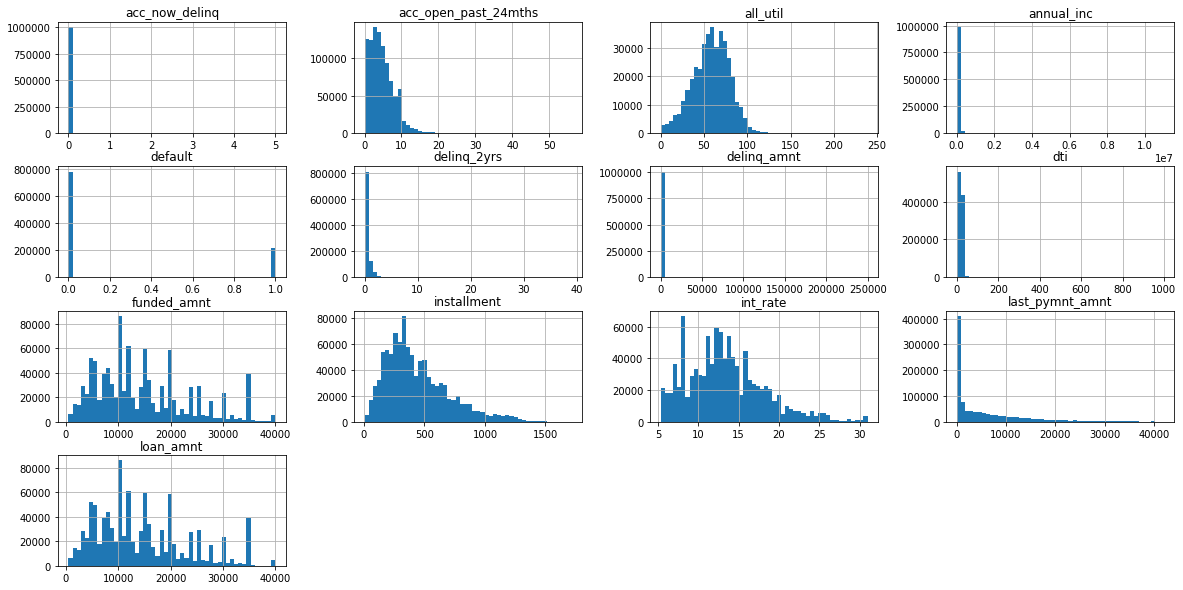

In [108]:
data.iloc[:,0:20].hist(bins = 50, figsize=(20,10))
plt.show()

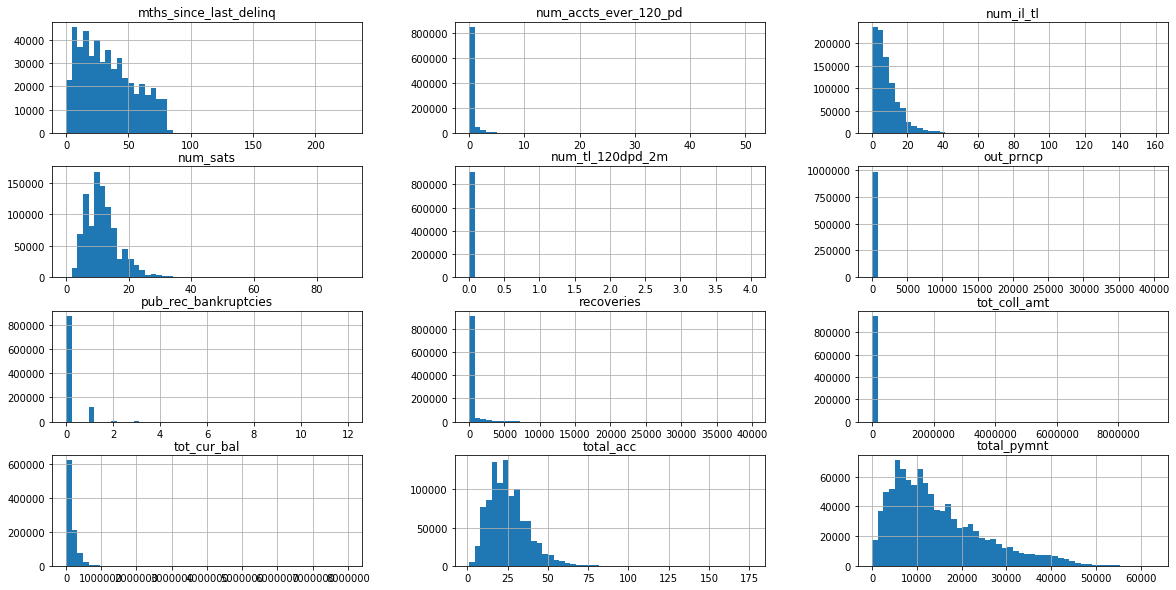

In [109]:
data.iloc[:,21:].hist(bins = 50, figsize=(20,10))
plt.show()

### 4.2. Correlation graph

Finally, we create the correlation graph. This graph indicates how related the variables are, from warmer to colder colors. The red ones indicate the highest correlations and vice versa.
This method has proved to be decisive in the choice of variables, allowing us to eliminate redundant variables in our study. The variables that are very correlated can, by definition, explain one another very well, and therefor, there is no need to use both of them in the study. 

In [110]:
corr = data.corr()

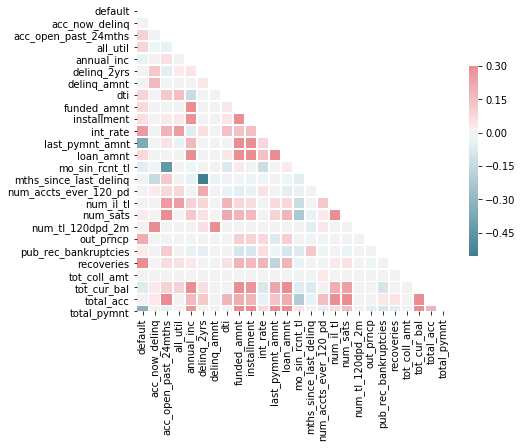

In [111]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. Categorical and numerical datasets

To facilitate the treatment of our variables, we decide to split our data into two dataframes: one for the treatment of numerical variables (loans_num) and a different one for the treatment of the categorical ones (loans_cat).

In [112]:
loans_num = data.select_dtypes(include = [np.number])
loans_cat = data.select_dtypes(include = [np.object])

Preview of both datasets.

In [113]:
loans_num.head()

,default,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,...,num_il_tl,num_sats,num_tl_120dpd_2m,out_prncp,pub_rec_bankruptcies,recoveries,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt
0,0,0.0,10.0,NaN,62000.0,1.0,0.0,19.84,19875,528.79,...,17.0,19.0,0.0,0.0,0.0,0.0,6471.0,80960.0,44.0,26177.320006
1,0,0.0,5.0,NaN,35000.0,0.0,0.0,6.76,4000,127.52,...,3.0,5.0,0.0,0.0,0.0,0.0,0.0,3653.0,7.0,4490.450000
2,0,0.0,NaN,NaN,60000.0,0.0,0.0,5.80,10000,312.91,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,10.0,10852.261203
3,0,0.0,12.0,43.0,75500.0,0.0,0.0,16.80,3500,113.71,...,7.0,16.0,0.0,0.0,0.0,0.0,664.0,203637.0,29.0,3554.334411
4,1,0.0,2.0,86.0,58803.0,0.0,0.0,26.06,12250,373.99,...,5.0,6.0,0.0,0.0,1.0,0.0,0.0,54631.0,9.0,6311.910000


In [114]:
loans_cat.head()

,addr_state,application_type,desc,emp_length,grade,home_ownership,initial_list_status,term,title,debt_settlement_flag
0,AR,Individual,NaN,< 1 year,E,MORTGAGE,f,60 months,Debt consolidation,N
1,NJ,Individual,NaN,4 years,B,RENT,w,36 months,Debt consolidation,N
2,TX,Individual,I am requesting a small loan as an advance to...,1 year,A,MORTGAGE,f,36 months,Wedding Expense,N
3,TX,Individual,NaN,< 1 year,B,MORTGAGE,w,36 months,Other,N
4,GA,Individual,NaN,10+ years,F,RENT,w,60 months,NaN,N


### 5.1. Treatment of the numerical dataset

Regarding the numerical variables, we have to deal with the missing data in different ways:

1. Replacing some NaN by random values within a range that we chose by analizing the values in each variable. We decided to do this with certain variables, because they had too high a number of NaNs to consider deleting them all. The variables chosen include:

    - num_accts_ever_120_pd
    - num_il_tl
    - num_sats
    - num_tl_120dpd_2m
    - tot_coll_amt
    - tot_cur_bal
    
    
2. Converting the variables into categorical in the cases where we wanted to keep the missing values as an important information. This happens only with two of our variables, where we considered that the lack of information had a relevant relation to whether the borrower would pay pack their loan or not. These are:

    -  all_util
    - delinq_amnt
    
    
3. Replace other NaN values by the mean of their column or by 0. Similar to the first method, in these cases the number of NaNs in our variables where too high to be deleted, but not relevant enough for us to create a range of random values:

    - annal_inc (mean)
    - mo_sin_rcnt_tl (mean)
    - mths_since_last_delinq (0)


4. Drop the missing values (this step will take place after the treatment of both datasets, numerical and categorical). In these cases, the number of missing values was so low that we decided that it would not have a nig influence on our results if we decided to delete them from our data base:

    - dti
    - acc_open_past_24mths
    - pub_rec_bankruptcies

In [115]:
loans_num.columns

Index(['default', 'acc_now_delinq', 'acc_open_past_24mths', 'all_util',
       'annual_inc', 'delinq_2yrs', 'delinq_amnt', 'dti', 'funded_amnt',
       'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt',
       'mo_sin_rcnt_tl', 'mths_since_last_delinq', 'num_accts_ever_120_pd',
       'num_il_tl', 'num_sats', 'num_tl_120dpd_2m', 'out_prncp',
       'pub_rec_bankruptcies', 'recoveries', 'tot_coll_amt', 'tot_cur_bal',
       'total_acc', 'total_pymnt'],
      dtype='object')

#### Dealing with missing data

1. We replace the Nas values for random values contained in a range; we have considered the most appropiate one for each variable in order to do so by studying their values (with functions and the histograms presented previously).

In [116]:
#First, we fill al NAS by the value -1
loans_num['num_accts_ever_120_pd'].fillna(-1, inplace=True)
loans_num['num_il_tl'].fillna(-1, inplace=True)
loans_num['num_sats'].fillna(-1, inplace=True)
loans_num['num_tl_120dpd_2m'].fillna(-1, inplace=True)
loans_num['tot_coll_amt'].fillna(-1, inplace=True)
loans_num['tot_cur_bal'].fillna(-1, inplace=True)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [117]:
# And then we replace the -1 value by a random one
loans_num['num_accts_ever_120_pd'] =  loans_num['num_accts_ever_120_pd'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['num_il_tl'] =  loans_num['num_il_tl'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['num_sats'] =  loans_num['num_sats'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['num_tl_120dpd_2m'] =  loans_num['num_tl_120dpd_2m'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['tot_coll_amt'] =  loans_num['tot_coll_amt'].map(lambda v: (random.randint(0,5)) if v == -1 else v)
loans_num['tot_cur_bal'] =  loans_num['tot_cur_bal'].map(lambda v: (random.randint(0,5)) if v == -1 else v)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

2. Convert the variables into categorical on in the cases we wanted to keep the missing values as an important information.

- 'all_util', values greater than 100 = 1, the rest = 0, because we considered that anything that goes beyond a ratio of 1 means that the borrower is more likely to default (owes more than he/she earns):

In [118]:
loans_num[loans_num['all_util'] > 100] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [119]:
loans_num['all_util'] = (loans_num['all_util'] == 1).astype(int)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- 'delinq_amnt', values equal to 0 = 0, the rest = 1, becausue we decided that if the borrower doesn't have any sort of delinquent amount that they owe, they are less likely to commit default on a later loan.

In [120]:
loans_num[loans_num['delinq_amnt'] != 0] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
loans_num['delinq_amnt'] = (loans_num['delinq_amnt'] == 1).astype(int)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
loans_num.delinq_amnt.unique()

array([0, 1], dtype=int64)

3. Replace other NaN values by the mean of their column or by 0.

Mean
- annal_inc
- mo_sin_rcnt_tl

In [123]:
loans_num['annual_inc'].fillna(76163.16, inplace=True)

In [124]:
loans_num['mo_sin_rcnt_tl'].fillna(7.84, inplace=True)

0
- mths_since_last_delinq

In [125]:
loans_num['mths_since_last_delinq'].fillna(0, inplace=True)

The next variables have information related to the progress of the loans that are accepted, so we have to delete them.

In [126]:
del loans_num['last_pymnt_amnt']
del loans_num['total_pymnt']
del loans_num['out_prncp']

#### Scaling the numeric variables:

When scaling the numeric variables, we have to remember that we cannot include the dependent variable "default", so we exclude it from this process and will include it again later on.

In [127]:
scaler = MinMaxScaler()
scaled_loans = scaler.fit_transform(loans_num.iloc[:,1:])
scaled_loans = pd.DataFrame(scaled_loans, columns=['acc_now_delinq', 'acc_open_past_24mths', 'all_util', 'annual_inc',
                                                   'delinq_2yrs','delinq_amnt','dti','funded_amnt','installment','int_rate',
                                                   'loan_amnt','mo_sin_rcnt_tl','mths_since_last_delinq','num_accts_ever_120_pd',
                                                   'num_il_tl','num_sats','num_tl_120dpd_2m','pub_rec_bankruptcies','recoveries',
                                                   'tot_coll_amt','tot_cur_bal','total_acc'])
scaled_loans.head()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,int_rate,...,mths_since_last_delinq,num_accts_ever_120_pd,num_il_tl,num_sats,num_tl_120dpd_2m,pub_rec_bankruptcies,recoveries,tot_coll_amt,tot_cur_bal,total_acc
0,0.0,0.178571,0.0,0.005637,0.025641,0.0,0.02084,0.496862,0.307853,0.640213,...,0.061947,0.000000,0.106918,0.211111,0.0,0.000000,0.0,7.070165e-04,0.010120,0.245714
1,0.0,0.089286,0.0,0.003182,0.000000,0.0,0.00776,0.099977,0.073798,0.272424,...,0.000000,0.000000,0.018868,0.055556,0.0,0.000000,0.0,0.000000e+00,0.000457,0.034286
2,0.0,NaN,0.0,0.005455,0.000000,0.0,0.00680,0.249981,0.181933,0.230077,...,0.000000,0.000000,0.031447,0.055556,1.0,0.000000,0.0,3.277777e-07,0.000000,0.051429
3,0.0,0.214286,0.0,0.006864,0.000000,0.0,0.01780,0.087477,0.065742,0.315772,...,0.185841,0.019608,0.044025,0.177778,0.0,0.000000,0.0,7.254813e-05,0.025454,0.160000
4,0.0,0.035714,0.0,0.005346,0.000000,0.0,0.02706,0.306233,0.217560,0.866622,...,0.000000,0.000000,0.031447,0.066667,0.0,0.083333,0.0,0.000000e+00,0.006829,0.045714


### 5.2. Treatment of the categorical dataset: Dummies

#### Dummies

In [128]:
# categoric dummies
loans_cat.columns

Index(['addr_state', 'application_type', 'desc', 'emp_length', 'grade',
       'home_ownership', 'initial_list_status', 'term', 'title',
       'debt_settlement_flag'],
      dtype='object')

### addr_state 

To transform this variable into dummie, since there are a lot of different values, we decide to group them. After analyzing the variable's histogram, we concluded that the best way to divide the values was into four different groups, based on how influential they were to the variable. The division was made as follows.

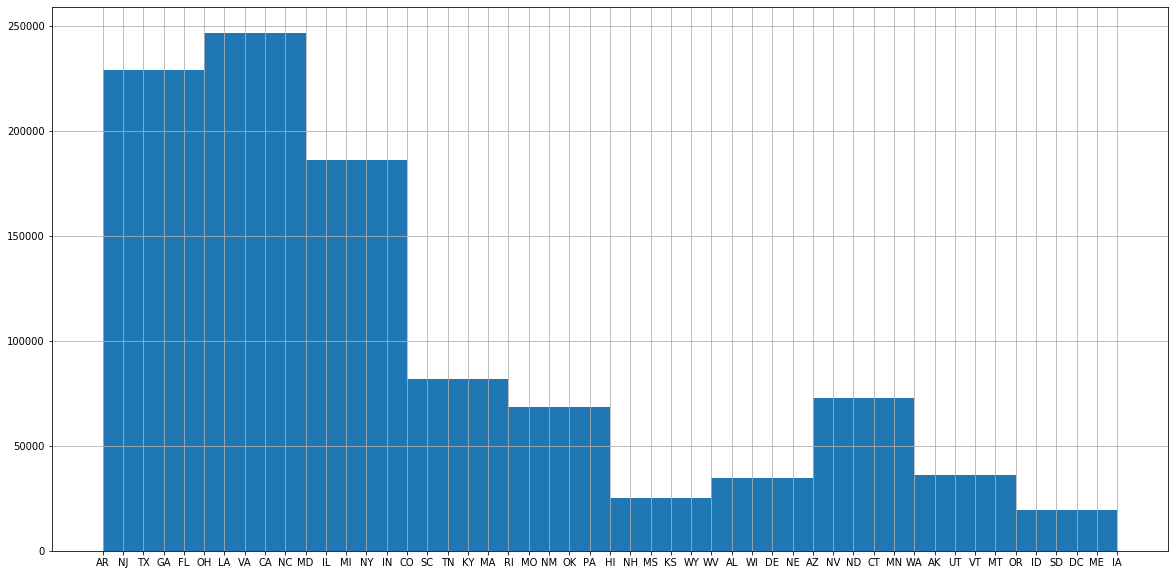

In [129]:
loans_cat.addr_state.hist(figsize = (20,10))

In [130]:
loans_cat.addr_state.unique()

array(['AR', 'NJ', 'TX', 'GA', 'FL', 'OH', 'LA', 'VA', 'CA', 'NC', 'MD',
       'IL', 'MI', 'NY', 'IN', 'CO', 'SC', 'TN', 'KY', 'MA', 'RI', 'MO',
       'NM', 'OK', 'PA', 'HI', 'NH', 'MS', 'KS', 'WY', 'WV', 'AL', 'WI',
       'DE', 'NE', 'AZ', 'NV', 'ND', 'CT', 'MN', 'WA', 'AK', 'UT', 'VT',
       'MT', 'OR', 'ID', 'SD', 'DC', 'ME', 'IA'], dtype=object)

In [131]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'CA') | (loans_cat['addr_state'] == 'OH') | 
                                       (loans_cat['addr_state'] == 'WA') | (loans_cat['addr_state'] == 'TX') | 
                               (loans_cat['addr_state'] == 'MA'), 'first', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'PA') | (loans_cat['addr_state'] == 'MI') | 
                                       (loans_cat['addr_state'] == 'ID') | (loans_cat['addr_state'] == 'AZ') | 
                               (loans_cat['addr_state'] == 'NY'), 'second', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'LA') | (loans_cat['addr_state'] == 'RI') | 
                                       (loans_cat['addr_state'] == 'IL') | (loans_cat['addr_state'] == 'TN') | 
                               (loans_cat['addr_state'] == 'NV') | (loans_cat['addr_state'] == 'MN') | (loans_cat['addr_state'] == 'NM')
                                   | (loans_cat['addr_state'] == 'NJ') | (loans_cat['addr_state'] == 'CO') | (loans_cat['addr_state'] == 'VA') |
                                   (loans_cat['addr_state'] == 'NC') | (loans_cat['addr_state'] == 'FL') | (loans_cat['addr_state'] == 'KY') |
                                   (loans_cat['addr_state'] == 'OK') | (loans_cat['addr_state'] == 'CT') | (loans_cat['addr_state'] == 'MD') |
                                   (loans_cat['addr_state'] == 'NH') | (loans_cat['addr_state'] == 'IN') | (loans_cat['addr_state'] == 'GA') |
                                   (loans_cat['addr_state'] == 'AL'), 'third', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
loans_cat['addr_state'] = np.where((loans_cat['addr_state'] == 'MT') | (loans_cat['addr_state'] == 'SC') | 
                                       (loans_cat['addr_state'] == 'DC') | (loans_cat['addr_state'] == 'OR') | 
                               (loans_cat['addr_state'] == 'NE') | (loans_cat['addr_state'] == 'KS') | 
                                   (loans_cat['addr_state'] == 'HI') | (loans_cat['addr_state'] == 'AK') | 
                                   (loans_cat['addr_state'] == 'VT') | (loans_cat['addr_state'] == 'MO') |
                                   (loans_cat['addr_state'] == 'UT') | (loans_cat['addr_state'] == 'AR') | 
                                   (loans_cat['addr_state'] == 'MS') | (loans_cat['addr_state'] == 'WI') | 
                                   (loans_cat['addr_state'] == 'ND') | (loans_cat['addr_state'] == 'DE') |
                                   (loans_cat['addr_state'] == 'WV') | (loans_cat['addr_state'] == 'ME') | 
                                   (loans_cat['addr_state'] == 'SD') | (loans_cat['addr_state'] == 'WY') |
                                   (loans_cat['addr_state'] == 'IA'), 'fourth', loans_cat['addr_state'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [135]:
loans_cat.addr_state.unique()

array(['fourth', 'third', 'first', 'second'], dtype=object)

### emp_length 

To make this variable into dummies but not create too many variables for our models, we decided to treat this variable like the state variable previously, dividing into groups that we classified according to the values that we considered to be more similar. The variables are divided into three groups and are made as follows:

In [136]:
loans_cat['emp_length'].fillna(0, inplace=True)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [137]:
loans_cat.emp_length.unique()

array(['< 1 year', '4 years', '1 year', '10+ years', 0, '7 years',
       '8 years', '5 years', '6 years', '9 years', '3 years', '2 years'],
      dtype=object)

In [138]:
#tramificar

In [139]:
loans_cat['emp_length'] = np.where((loans_cat['emp_length'] == '< 1 year') | (loans_cat['emp_length'] == '1 year') | 
                                       (loans_cat['emp_length'] == '2 years') | (loans_cat['emp_length'] == '3 years') | 
                               (loans_cat['emp_length'] == 0), '0-3', loans_cat['emp_length'].values)

loans_cat['emp_length'] = np.where((loans_cat['emp_length'] == '4 years') | (loans_cat['emp_length'] == '5 years') | 
                                       (loans_cat['emp_length'] == '6 years') | (loans_cat['emp_length'] == '7 years') | 
                               (loans_cat['emp_length'] == '8 years') | 
                               (loans_cat['emp_length'] == '9 years'), '4-9', loans_cat['emp_length'].values)

loans_cat['emp_length'] = np.where((loans_cat['emp_length'] == '10+ years'), '10+', loans_cat['emp_length'].values)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [140]:
loans_cat.emp_length.unique()

array(['0-3', '4-9', '10+'], dtype=object)

###  home_ownership

The only this that we decided to treat in this variable before turning it into a dummie variable is to group "ANY", "OTHER" and the missing values into the same category, as we found that these three do not explain anything specific about the borrower; there is no additional information in any of them. 

In [141]:
loans_cat.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [142]:
loans_cat.loc[loans_cat['home_ownership'] == 'ANY', 'home_ownership'] = 'OTHER'

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
loans_cat.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

### application_type 

In the case of this variable, as explained earlier, we concluded that the applications that were made with two co-borrowers it is more likely to be paid back on our loan that with only one borrower, so we asign a 1 and a 0 to each unique value.

In [144]:
loans_cat[loans_cat['application_type'] == 'joint app'] = 1
loans_cat[loans_cat['application_type'] == 'inidv'] = 0

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\frame.py:3488: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.o

### initial_list_status, term, debt_settlement_flag, grade

These three variables have no missing values, so we can just turn these into dummies directly.

In [145]:
loans_cat.initial_list_status.unique()

array(['f', 'w'], dtype=object)

In [146]:
loans_cat.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [147]:
loans_cat.debt_settlement_flag.unique()

array(['N', 'Y'], dtype=object)

In [148]:
loans_cat.grade.unique()

array(['E', 'B', 'A', 'F', 'C', 'D', 'G'], dtype=object)

### title 

The only values that we considered as relevant in this variable were "Debt consolidation" and "Credit card refinancing", as they are the only reaosns out of all offered in the variable which are related to a difficulty in payment or higher chances of delinquency. We decided to fill all the cases where these values were recored with a 1 and the rest with 0. 

In [149]:
loans_cat.title.unique()

array(['Debt consolidation', 'Wedding Expense', 'Other', ...,
       'CREDIT CARD LESSONS', ' DEBT PAYDOWN', 'NO LONGSHOT HERE'],
      dtype=object)

In [150]:
loans_cat['title'].fillna(1, inplace=True)

In [151]:
loans_cat.loc[loans_cat['title'] == 'Debt consolidation', 'title'] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
loans_cat.loc[loans_cat['title'] == 'Credit card refinancing', 'title'] = 1

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
loans_cat['title'] = (loans_cat['title'] == 1).astype(int)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
loans_cat.title.unique()

array([1, 0], dtype=int64)

### desc 

As explained in the beginning, we associated the lack of information in this variable to lack of intention from the borrower to let the bank know any additional information on their reasons for taking out a loan. This is a characteristic that could be due to privacy reasons or higher probability of delinquency. Due to this, we decided to fill all the missing values with a 1 and the cases in which information was given with 0. 

In [155]:
loans_cat['desc'].fillna(1, inplace=True)

In [156]:
loans_cat['desc'] = (loans_cat['desc'] == 1).astype(int) 

C:\Users\Luli\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
# check
loans_cat.desc.unique()

array([1, 0], dtype=int64)

After treating all the categorical variables, we decide to check if there are any leftover missing values that we might have missed in the variables before executing the function to turn them into dummies. 

In [158]:
loans_cat.isna().sum()

addr_state              0
application_type        0
desc                    0
emp_length              0
grade                   0
home_ownership          0
initial_list_status     0
term                    0
title                   0
debt_settlement_flag    0
dtype: int64

We delete the next variable because we do not obtain this information until the loan is accepted, and there is no way for us to know this information before deciding to grant these loans. Up next we turn our variables into dummies.

In [159]:
del loans_cat['debt_settlement_flag']

In [160]:
dummies = pd.get_dummies(loans_cat)

In [161]:
dummies.head()

,desc,title,addr_state_first,addr_state_fourth,addr_state_second,addr_state_third,application_type_Individual,application_type_Joint App,emp_length_0-3,emp_length_10+,...,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months
0,1,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
4,1,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [162]:
# we check once more to see if there are any missing values in our dummy variables
dummies.isna().sum()

desc                           0
title                          0
addr_state_first               0
addr_state_fourth              0
addr_state_second              0
addr_state_third               0
application_type_Individual    0
application_type_Joint App     0
emp_length_0-3                 0
emp_length_10+                 0
emp_length_4-9                 0
grade_A                        0
grade_B                        0
grade_C                        0
grade_D                        0
grade_E                        0
grade_F                        0
grade_G                        0
home_ownership_MORTGAGE        0
home_ownership_NONE            0
home_ownership_OTHER           0
home_ownership_OWN             0
home_ownership_RENT            0
initial_list_status_f          0
initial_list_status_w          0
term_ 36 months                0
term_ 60 months                0
dtype: int64

#### Last steps

Before treating the outlier values in our variables, we have to combine the scaled numerical and dummy categorical datasets in to a single dataframe which we will be using from now on.

In [163]:
# combine dummies and scaled numeric data
loan_final = pd.concat([scaled_loans, dummies], axis = 1)

In [164]:
loan_final.head()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,delinq_2yrs,delinq_amnt,dti,funded_amnt,installment,int_rate,...,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,term_ 36 months,term_ 60 months
0,0.0,0.178571,0.0,0.005637,0.025641,0.0,0.02084,0.496862,0.307853,0.640213,...,0,1,0,0,0,0,1,0,0,1
1,0.0,0.089286,0.0,0.003182,0.000000,0.0,0.00776,0.099977,0.073798,0.272424,...,0,0,0,0,0,1,0,1,1,0
2,0.0,NaN,0.0,0.005455,0.000000,0.0,0.00680,0.249981,0.181933,0.230077,...,0,1,0,0,0,0,1,0,1,0
3,0.0,0.214286,0.0,0.006864,0.000000,0.0,0.01780,0.087477,0.065742,0.315772,...,0,1,0,0,0,0,0,1,1,0
4,0.0,0.035714,0.0,0.005346,0.000000,0.0,0.02706,0.306233,0.217560,0.866622,...,0,0,0,0,0,1,0,1,0,1


In [165]:
loan_final['default'] = loans_num['default']

#### Deleting the remaining missing values

In this last step before studying the ooutliers, we delete the remaining NAs from our dataset which we decide dthat would be deleted because there was a small amount of them. 

In [166]:
loan_final.isna().sum()

acc_now_delinq                     0
acc_open_past_24mths           37597
all_util                           0
annual_inc                         0
delinq_2yrs                        0
delinq_amnt                        0
dti                              260
funded_amnt                        0
installment                        0
int_rate                           0
loan_amnt                          0
mo_sin_rcnt_tl                     0
mths_since_last_delinq             0
num_accts_ever_120_pd              0
num_il_tl                          0
num_sats                           0
num_tl_120dpd_2m                   0
pub_rec_bankruptcies             992
recoveries                         0
tot_coll_amt                       0
tot_cur_bal                        0
total_acc                          0
desc                               0
title                              0
addr_state_first                   0
addr_state_fourth                  0
addr_state_second                  0
a

The variables that we will remove the missing values from are:
- dti
- acc_open_past_24mths
- pub_rec_bankruptcies

In [167]:
loan_final.dti = loan_final.dti.isna()
loan_final.acc_open_past_24mths = loan_final.acc_open_past_24mths.isna()
loan_final.pub_rec_bankruptcies = loan_final.pub_rec_bankruptcies.isna()

### 5.3 OUTLIERS

One by one, we study all our numerical variables (with the histograms and filters) to see if there are any outlying values that could affect our models. After a thorough study of these, we reach the conclusion that the variables which have outliers are:

- __acc_now_delinq__: we decided that any value greater than two in this variables is an outlier, since any client that has more than two accounts which are delinquient has higher probabilities of committing default.
- __delinq_2yrs__: in this case we eliminated outliers that we saw to be values bigger than 10, which is a pretty big number of incidences per account but anything lower included a lot of cases and could not be considered an outlier.
- __total_acc__: This variable has outliers after the value of 102, which is also a big number but the reason is the same as before. We based these decisions on a study of the histograms.
- __acc_open_past_24mths__: in this case, we delete all values bigger than 35. 
- __pub_rec_bankruptcies__: here we considered outliers all values larger than 5 in the variable.
- __annual_inc__: here it was decided that the outlier was anyone who earned more than 200.000 dollars per year (we investigated what the highest paying job average salary was)
- __mo_sin_rcnt_tl__: for this last variable, we chose to delete any values higher than 120 months, as any account opened before that is most likely not relevant today. 

Up next we delete the outliers explained before:

In [168]:
loans_num.drop(loans_num[loans_num.acc_now_delinq > 2].index, inplace = True)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
loan_final.drop(loan_final[loan_final.delinq_2yrs > 10].index, inplace = True)

In [170]:
loan_final.drop(loan_final[loan_final.total_acc > 102].index, inplace = True)

In [171]:
loan_final.drop(loan_final[loan_final.acc_open_past_24mths > 35].index, inplace = True)

In [172]:
loan_final.drop(loan_final[loan_final.pub_rec_bankruptcies > 5].index, inplace = True)

In [173]:
loan_final.drop(loan_final[loan_final.annual_inc > 200000].index, inplace = True)

In [174]:
loan_final.drop(loan_final[loan_final.mo_sin_rcnt_tl > 120].index, inplace = True)

In [175]:
# check nas one last time
loan_final.isna().sum()

acc_now_delinq                 0
acc_open_past_24mths           0
all_util                       0
annual_inc                     0
delinq_2yrs                    0
delinq_amnt                    0
dti                            0
funded_amnt                    0
installment                    0
int_rate                       0
loan_amnt                      0
mo_sin_rcnt_tl                 0
mths_since_last_delinq         0
num_accts_ever_120_pd          0
num_il_tl                      0
num_sats                       0
num_tl_120dpd_2m               0
pub_rec_bankruptcies           0
recoveries                     0
tot_coll_amt                   0
tot_cur_bal                    0
total_acc                      0
desc                           0
title                          0
addr_state_first               0
addr_state_fourth              0
addr_state_second              0
addr_state_third               0
application_type_Individual    0
application_type_Joint App     0
emp_length

## 6. Lasso model (variable importance)

In [176]:
# Turning bool values into float to be used in the lasso
loan_final.acc_open_past_24mths = loan_final.acc_open_past_24mths.astype('float64')
loan_final.dti = loan_final.dti.astype('float64')
loan_final.pub_rec_bankruptcies = loan_final.pub_rec_bankruptcies.astype('float64')

In [80]:
## we check to see if our variables are all nunmbers that can be computed in our models
loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 50 columns):
acc_now_delinq                 1000000 non-null float64
acc_open_past_24mths           1000000 non-null float64
all_util                       1000000 non-null float64
annual_inc                     1000000 non-null float64
delinq_2yrs                    1000000 non-null float64
delinq_amnt                    1000000 non-null float64
dti                            1000000 non-null float64
funded_amnt                    1000000 non-null float64
installment                    1000000 non-null float64
int_rate                       1000000 non-null float64
loan_amnt                      1000000 non-null float64
mo_sin_rcnt_tl                 1000000 non-null float64
mths_since_last_delinq         1000000 non-null float64
num_accts_ever_120_pd          1000000 non-null float64
num_il_tl                      1000000 non-null float64
num_sats                       1000000 non-null 

To launch our Lasso model, first of all we have to divide our variables into exogenous (all of our variables except our dependent variable) and endogenous variables (the dependen variable "default").

In [177]:
random.seed(123)
endogena = ['default']
exogenas = list(set(list(loan_final.columns))-set(endogena))
X = loan_final[exogenas].values
Y = loan_final[endogena].values

We finally launch the Lasso model with 1000 iterations and a cross validation equal to 10 to ensure a better accuracy of the selection of variables. We also ask for the time required for the execution out of curiosity in all of the models, to figure out which ones are more time extensive. It's very importante that we launch our lasso model with the entire dataset, and only start dividing between train and test when executing the models which predict.

In [85]:
%%time
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1000)
lassocv.fit(X, Y)
lassocv.alpha_
model_lasso = Lasso(alpha = lassocv.alpha_) # lasso function
model_lasso.fit(X, Y)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.232462094834773, tolerance: 17.304313707901496
  positive)


Wall time: 9min 12s


C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.232462094834773, tolerance: 17.304313707901496
  positive)


Lasso(alpha=3.154164005101125e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
# model_lasso.coef_. The coefficients obtained with the lasso model tell us which variables are more relevant in our study and 
# give us the selection that we should use in the following models
coeficientes_lasso = pd.DataFrame(model_lasso.coef_, exogenas, columns = ['Coefficients'])

In [87]:
coeficientes_lasso

,Coefficients
addr_state_third,0.006892
grade_A,-0.014065
addr_state_second,0.005997
delinq_2yrs,0.115863
all_util,0.064452
initial_list_status_w,0.013358
num_accts_ever_120_pd,0.011826
installment,0.153846
int_rate,0.325741
mths_since_last_delinq,0.001691


By looking at these coefficients, we conclude that we should only include those variables which have a coefficient larger than 0.04 level of importance in the Lasso model. We make a filter which will exclude the variables that we don't consider important and create a new dataset only with the relevant ones.

In [88]:
relevantes = coeficientes_lasso[(coeficientes_lasso['Coefficients'] > 0.04) | (coeficientes_lasso['Coefficients'] < -0.04)]

In [89]:
relevantes

,Coefficients
delinq_2yrs,0.115863
all_util,0.064452
installment,0.153846
int_rate,0.325741
application_type_Joint App,0.084557
pub_rec_bankruptcies,0.068675
term_ 36 months,-0.071135
total_acc,-0.253354
num_sats,0.302834
num_tl_120dpd_2m,0.048662


In [90]:
relevants_list = list(relevantes.index)
relevants_list

['delinq_2yrs',
 'all_util',
 'installment',
 'int_rate',
 'application_type_Joint App',
 'pub_rec_bankruptcies',
 'term_ 36 months',
 'total_acc',
 'num_sats',
 'num_tl_120dpd_2m',
 'funded_amnt',
 'delinq_amnt',
 'recoveries',
 'mo_sin_rcnt_tl',
 'tot_cur_bal']

By looking at the Lasso coefficients, we conclude that we should only include those variables which have a coefficient larger than 0.04 level of importance in the Lasso model. We make a filter which will exclude the variables that we don't consider important and create a new dataset only with the relevant ones.

Our final dataset has a total of 15 variables which we can see up next: 

In [178]:
relevants = ['delinq_2yrs',
 'all_util',
 'installment',
 'int_rate',
 'application_type_Joint App',
 'pub_rec_bankruptcies',
 'term_ 36 months',
 'total_acc',
 'num_sats',
 'num_tl_120dpd_2m',
 'funded_amnt',
 'delinq_amnt',
 'recoveries',
 'mo_sin_rcnt_tl',
 'tot_cur_bal']

In [179]:
data_lasso = loan_final.loc[:, ['delinq_2yrs',
 'all_util',
 'installment',
 'int_rate',
 'application_type_Joint App',
 'pub_rec_bankruptcies',
 'term_ 36 months',
 'total_acc',
 'num_sats',
 'num_tl_120dpd_2m',
 'funded_amnt',
 'delinq_amnt',
 'recoveries',
 'mo_sin_rcnt_tl',
 'tot_cur_bal']]

Last of all, we introduce the dependent variable in the final dataset, create the new exogenous and endogenous variables and start executing the models with that.

In [180]:
data_lasso['default'] = loan_final['default']

In [181]:
data_lasso.describe()

,delinq_2yrs,all_util,installment,int_rate,application_type_Joint App,pub_rec_bankruptcies,term_ 36 months,total_acc,num_sats,num_tl_120dpd_2m,funded_amnt,delinq_amnt,recoveries,mo_sin_rcnt_tl,tot_cur_bal,default
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.008137,0.009091,0.253530,0.406447,0.019453,0.000992,0.755759,0.135596,0.123571,0.046684,0.358371,0.008584,0.005742,0.026898,0.016480,0.222589
std,0.022093,0.094912,0.153846,0.163133,0.138111,0.031480,0.429636,0.069337,0.063513,0.176395,0.219690,0.092251,0.023348,0.029296,0.019517,0.415985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142929,0.290430,0.000000,0.000000,1.000000,0.085714,0.077778,0.000000,0.192480,0.000000,0.000000,0.010381,0.003012,0.000000
50%,0.000000,0.000000,0.217502,0.391464,0.000000,0.000000,1.000000,0.125714,0.111111,0.000000,0.299982,0.000000,0.000000,0.020761,0.008415,0.000000
75%,0.000000,0.000000,0.337671,0.499833,0.000000,0.000000,1.000000,0.177143,0.155556,0.000000,0.499987,0.000000,0.000000,0.031142,0.025020,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
data_lasso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
delinq_2yrs                   1000000 non-null float64
all_util                      1000000 non-null float64
installment                   1000000 non-null float64
int_rate                      1000000 non-null float64
application_type_Joint App    1000000 non-null uint8
pub_rec_bankruptcies          1000000 non-null float64
term_ 36 months               1000000 non-null uint8
total_acc                     1000000 non-null float64
num_sats                      1000000 non-null float64
num_tl_120dpd_2m              1000000 non-null float64
funded_amnt                   1000000 non-null float64
delinq_amnt                   1000000 non-null float64
recoveries                    1000000 non-null float64
mo_sin_rcnt_tl                1000000 non-null float64
tot_cur_bal                   1000000 non-null float64
default                       1000000 non-null int64
dtypes: float6

## 7. TRAIN & TEST and Oversampling

To make predictions with any model, the most important and first step is to divide our dataset into what will be used to train the model and what will be used to predict the outcome. The train part of the dataset is what we will launch the models with and the test part will make the predictions after creating the models. Very important not to use the test part for forming the models, as the study would be worthless.

In [182]:
exogenas = list(set(list(data_lasso.columns))-set(endogena))
train_features = data_lasso[exogenas].values
train_labels = data_lasso[endogena].values

In [183]:
train = pd.concat([pd.DataFrame(train_features), pd.DataFrame(train_labels)])

In [184]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.024221,0.025641,0.0,0.0,0.0,0.010120,0.0,0.496862,0.0,0.0,0.211111,0.245714,0.307853,0.640213
1,0.0,0.000000,0.000000,0.0,0.0,1.0,0.000457,0.0,0.099977,0.0,0.0,0.055556,0.034286,0.073798,0.272424
2,1.0,0.027128,0.000000,0.0,0.0,1.0,0.000000,0.0,0.249981,0.0,0.0,0.055556,0.051429,0.181933,0.230077
3,0.0,0.013841,0.000000,0.0,0.0,1.0,0.025454,0.0,0.087477,0.0,0.0,0.177778,0.160000,0.065742,0.315772
4,0.0,0.010381,0.000000,0.0,0.0,0.0,0.006829,0.0,0.306233,0.0,0.0,0.066667,0.045714,0.217560,0.866622


In [103]:
csv_train_loans = train.to_csv("./data/csv_train_loans", index = None, header = True)

Since in our dataframe there is a lack of balance in the dependent variable regarding the amount of loans which end up in default and the ones which are fully paid (20% to 80%), we need to execute an oversampling function which will give us more values to predict more accurately. We create more cases similar to the ones which we already have with SMOTE and form a new set of training sets. 

In [185]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 40, sampling_strategy = 0.4)
train_features, train_labels = sm.fit_sample(train_features, train_labels)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [186]:
ytrain_df = pd.DataFrame(train_labels, columns = ['default'])
xtrain_df = pd.DataFrame(train_features, columns = [relevants])

In [187]:
ytrain_df['default'].value_counts(normalize=True)

0    0.714286
1    0.285714
Name: default, dtype: float64

In [188]:
train_df = pd.concat([xtrain_df, ytrain_df], axis = 1)
train_df

,"(delinq_2yrs,)","(all_util,)","(installment,)","(int_rate,)","(application_type_Joint App,)","(pub_rec_bankruptcies,)","(term_ 36 months,)","(total_acc,)","(num_sats,)","(num_tl_120dpd_2m,)","(funded_amnt,)","(delinq_amnt,)","(recoveries,)","(mo_sin_rcnt_tl,)","(tot_cur_bal,)",default
0,0.0,0.024221,0.025641,0.000000,0.0,0.0,1.011990e-02,0.0,0.496862,0.0,0.0,0.211111,0.245714,0.307853,0.640213,0
1,0.0,0.000000,0.000000,0.000000,0.0,1.0,4.566205e-04,0.0,0.099977,0.0,0.0,0.055556,0.034286,0.073798,0.272424,0
2,1.0,0.027128,0.000000,0.000000,0.0,1.0,0.000000e+00,0.0,0.249981,0.0,0.0,0.055556,0.051429,0.181933,0.230077,0
3,0.0,0.013841,0.000000,0.000000,0.0,1.0,2.545438e-02,0.0,0.087477,0.0,0.0,0.177778,0.160000,0.065742,0.315772,0
4,0.0,0.010381,0.000000,0.000000,0.0,0.0,6.828808e-03,0.0,0.306233,0.0,0.0,0.066667,0.045714,0.217560,0.866622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088370,0.0,0.015893,0.000000,0.006210,0.0,1.0,4.921281e-03,0.0,0.122013,0.0,0.0,0.100000,0.123389,0.096195,0.420574,1
1088371,0.0,0.021375,0.000000,0.180250,0.0,1.0,6.794036e-03,0.0,0.499987,0.0,0.0,0.139964,0.164608,0.398806,0.437404,1
1088372,0.6,0.013841,0.000000,0.000000,0.0,1.0,4.505990e-03,0.0,0.220323,0.0,0.0,0.088224,0.101661,0.203467,0.796103,1
1088373,0.0,0.013877,0.000000,0.001812,0.0,1.0,2.511902e-03,0.0,0.069925,0.0,0.0,0.111111,0.080000,0.052694,0.326905,1


In [189]:
train_df = train_df.to_csv("./data/train_df", index = None, header = True)

SMOTE allows us to limit our oversampling up to a 70, 30 more or less. If we decided to have 50, 50 of the values in the dependent variable, our model would be distorted, since we would be making up too many values and would distance ourselves from the reality of our original dataset.

## 8. SUPPORT VECTOR MACHINE

"A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes."
We launch the first predictive model in our study with a certain number of genral parameters to later be specified which are the most relevant with the function best_estimator_. We ask for 1000 iterations to make our model as precise as possible.

In [111]:
%%time
parametros_support = {'C':[1], 'break_ties':[False], 'cache_size':[200], 'class_weight':[None], 'coef0':[0.0],
    'decision_function_shape':['ovr'], 'degree':[3], 'gamma':['scale'], 'kernel':['linear']}
support_vector = GridSearchCV(estimator = SVC(max_iter = 1000),
             param_grid = parametros_support , scoring = 'roc_auc', n_jobs = -1, iid = False, cv = 3)
support_vector.fit(train_features, train_labels)

C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 3min 29s


C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=1000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=-1,
             param_grid={'C': [1], 'break_ties': [False], 'cache_size': [200],
                         'class_weight': [None], 'coef0': [0.0],
                         'decision_function_shape': ['ovr'], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [112]:
# this function allows us to see which parameters are the best for our specific model
support_vector.best_estimator_ 

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
%%time
best_SVC = support_vector.best_estimator_
best_SVC.fit(train_features, train_labels)

Wall time: 1min 19s


C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
pickle.dump(best_SVC, open('SVM_Model', 'wb'))

## 9. LOGISTIC REGRESSION

Logistic regression is a supervised learning technique. It is widely used in many industries due to its scalability and explainability. It is a small neural network. In fact, logistic regression, it is a one-neuron neural network. 

It is bounded between 0 and 1 and we can interpret its results as probabilities. 

It is easy to apply the model with scikit-learn.

In [95]:
%%time
reg_logistica = LogisticRegression(random_state = 40, solver = "saga", penalty = "l1", class_weight = "balanced", 
                                C = 1.0, max_iter = 500)
reg_logistica.fit(train_features, train_labels)

Wall time: 7min 39s


C:\Users\Luli\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=40, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
pickle.dump(reg_logistica, open('LR_Model', 'wb'))

## 10. RANDOM FOREST

Random Forest is a flexible and easy-to-use Machine Learning algorithm that produces a great result most of the time, even without a parameter adjustment. It is also one of the most used algorithms, due to its simplicity and the fact that it can be used for both classification and regression tasks.
Random Forest is a supervised learning algorithm that, as its name reveals, creates a forest randomly. To put it simply: it creates multiple decision trees and combines them to obtain an accurate and stable prediction. In general, the higher the number of trees, the more robust the forest will be.

In [135]:
%%time
parametros_RF = { 'bootstrap':[True], 'ccp_alpha':[0.0], 'class_weight':[None],
                       'criterion':['entropy'], 'max_depth':[8], 'max_features':['sqrt'],
                       'max_leaf_nodes':[None], 'max_samples':[None],
                       'min_impurity_decrease':[0.0], 'min_impurity_split':[None],
                       'min_samples_leaf':[1], 'min_samples_split':[2],
                       'min_weight_fraction_leaf':[0.0]
    
 }
random_forest = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = parametros_RF, scoring = 'roc_auc',n_jobs = -1, iid = False, cv = 3)
random_forest.fit(train_features, train_labels)

/Users/mariacarrasco/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


CPU times: user 20min 59s, sys: 5.87 s, total: 21min 5s
Wall time: 23min 45s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,...
                         'class_weight': [None], 'criterion': ['entropy'],
                         'max_depth'

In [127]:
random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
%%time
best_RF = random_forest.best_estimator_
best_RF.fit(train_features, train_labels)

CPU times: user 20min 55s, sys: 4.43 s, total: 21min
Wall time: 14min 56s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[3.01854080e-03 2.77845279e-03 2.92648448e-02 8.43867451e-03
 4.05505238e-03 1.04754116e-03 8.50954640e-03 1.30326121e-05
 3.76756510e-03 1.03514578e-02 6.38639685e-02 8.37548909e-03
 1.26154216e-02 8.30695888e-01 1.32045245e-02]


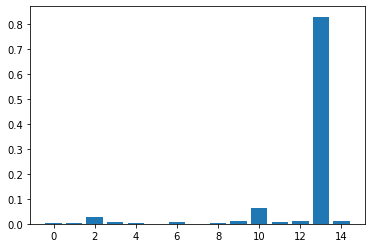

In [142]:
print(best_RF.feature_importances_)

list(best_RF.feature_importances_)

plt.bar(range(len(best_RF.feature_importances_)), best_RF.feature_importances_)
plt.show()

In [143]:
pd.DataFrame(best_RF.feature_importances_, relevants, columns = ['Importance'])

,Importance
total_acc,0.003019
int_rate,0.002778
tot_cur_bal,0.029265
mo_sin_rcnt_tl,0.008439
installment,0.004055
num_sats,0.001048
num_tl_120dpd_2m,0.008510
pub_rec_bankruptcies,0.000013
all_util,0.003768
term_ 60 months,0.010351


In [144]:
pickle.dump(best_RF, open('RF_Model', 'wb'))

## 11. XGBOOST

XGBoost means eXtreme Gradient Boosting. It is the algorithm that has recently been mastering Machine learning problems and Kaggle competitions with structured or tabular data. 
XGBoost is an implementation of decision trees with Gradient boosting designed to minimize execution speed and maximize performance.
Internally, XGBoost represents all problems as a case of regression predictive modeling that only takes numerical values as input. If our data is in a different format, we will first have to transform it in order to use the full power of this library

In [119]:
%%time
parametros_XGB = {'base_score':[0.5], 'booster' :['gbtree'], 'colsample_bylevel':[1],
              'colsample_bynode':[1], 'colsample_bytree':[0.8], 'gamma':[1],
              'learning_rate':[0.30000000000000004], 'max_delta_step':[0], 'max_depth':[3],
              'min_child_weight':[1], 'missing':[None], 'n_estimators':[500], 'n_jobs':[1],
              'nthread':[6], 'objective':['binary:logistic'], 'random_state':[0],
              'reg_alpha':[0], 'reg_lambda':[1], 'scale_pos_weight':[1], 'seed':[123],
              'silent':[None], 'subsample':[0.8], 'verbosity':[1]}
XGBoost_modelo = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators = 500, subsample = 0.8,
                                                             colsample_bytree = 0.8, objective = 'binary:logistic',
                                                             scale_pos_weight = 1, seed = 123, nthread = 6), 
                               param_grid = parametros_XGB, scoring = 'roc_auc', n_jobs = -1, iid = False, cv = 3)
XGBoost_modelo.fit(train_features, train_labels)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


CPU times: user 10min 30s, sys: 2.03 s, total: 10min 32s
Wall time: 21min 30s


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=6, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos...
                         'max_delta_step': [0], 'max_depth': [3],
                         'min_child_weight': [1], 'missing': [None],
                         'n_estimators': [500], 'n_jobs': [1], 'nthread': [6],
                         'objective': ['binary:logistic'], 'random_state': [0],
                       

In [120]:
XGBoost_modelo.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.30000000000000004, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=6, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=0.8, verbosity=1)

In [121]:
%%time
best_XGB = XGBoost_modelo.best_estimator_
best_XGB.fit(train_features, train_labels)

CPU times: user 10min 19s, sys: 876 ms, total: 10min 20s
Wall time: 10min 21s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.30000000000000004, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=6, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=0.8, verbosity=1)

[2.6453172e-03 8.8894868e-04 9.1397772e-03 2.0551556e-03 1.0400681e-03
 1.4011136e-01 5.4426247e-04 6.4567528e-03 4.8599988e-03 4.2244005e-03
 5.3355428e-03 2.7684995e-03 3.2268316e-04 0.0000000e+00 8.1960726e-01]


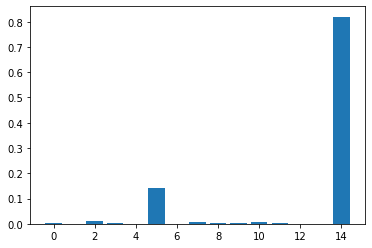

In [122]:
print(best_XGB.feature_importances_)

list(best_XGB.feature_importances_)

plt.bar(range(len(best_XGB.feature_importances_)), best_XGB.feature_importances_)
plt.show()

In [123]:
pd.DataFrame(best_XGB.feature_importances_, relevants, columns = ['Importance'])

,Importance
delinq_2yrs,0.002645
all_util,0.000889
installment,0.009140
int_rate,0.002055
application_type_Joint App,0.001040
pub_rec_bankruptcies,0.140111
term_ 36 months,0.000544
total_acc,0.006457
num_sats,0.004860
num_tl_120dpd_2m,0.004224


In [124]:
pickle.dump(best_XGB, open('XGB_Model', 'wb'))

## 14. References

* __Bambrick, N.__ (Jul de 2016). Support Vector Machines: A Simple Explanation. Obtenido de KDnuggets News: https://www.kdnuggets.com/2016/07/support-vector-machines-simple-explanation.html
* __Bodas, D.__ (2019). Apuntes Machine Learning MDS. Madrid: CUNEF.
* __Breiman, L.__ (January 2001). Random Forests. Berkeley: Statistics Department University of California.
* __Koehrsen, W.__ (27 de Dec de 2017). Random Forest in Python. Obtenido de Towards Data Science : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 
* __loan.csv. (s.f.).__ Lending Club Loan Data. Obtenido de kaggle: https://www.kaggle.com/wendykan/lending-club-loan-data
* __Seif, G.__ (29 de May de 2019). Towards Data Science . Obtenido de A Beginner’s guide to XGBoost: https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7